In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
tweets = pd.read_csv('setDeDatos/nlp-getting-started/train.csv')
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 0 to 7612
Data columns (total 7 columns):
id             7613 non-null int64
keyword        7613 non-null object
location       7613 non-null object
text           7613 non-null object
target         7613 non-null int64
text_long      7613 non-null int64
words_count    7613 non-null int64
dtypes: int64(4), object(3)
memory usage: 475.8+ KB


In [33]:
tweets['text_long'] = tweets['text'].apply(lambda x: len(x))

In [34]:
tweets['location'] = tweets['location'].fillna('sin ubicacion')
tweets['keyword'] = tweets['keyword'].fillna('sin keyword')

In [35]:
tweets['words_count'] = tweets['text'].apply(lambda x: len(x.split(' ')))

In [104]:
##Me quedo con las 10 ubicaciones con la mayor cantidad de tweets
location = tweets['location'].value_counts().head(10).reset_index()
tweets_filter = tweets[tweets['location'].isin(location['index'])]
tweets_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2937 entries, 0 to 7612
Data columns (total 7 columns):
id             2937 non-null int64
keyword        2937 non-null object
location       2937 non-null object
text           2937 non-null object
target         2937 non-null int64
text_long      2937 non-null int64
words_count    2937 non-null int64
dtypes: int64(4), object(3)
memory usage: 183.6+ KB


In [93]:
##Me quedo con las 10 keywords con mayor cantidad de tweets
keyword = tweets['keyword'].value_counts().head(10).reset_index()
tweets_filter = tweets_filter[tweets_filter['keyword'].isin(keyword['index'])]
tweets_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 7612
Data columns (total 7 columns):
id             194 non-null int64
keyword        194 non-null object
location       194 non-null object
text           194 non-null object
target         194 non-null int64
text_long      194 non-null int64
words_count    194 non-null int64
dtypes: int64(4), object(3)
memory usage: 12.1+ KB


In [94]:
heat_map = tweets_filter.groupby(['keyword','location']).agg({'text_long':'count'}).reset_index()

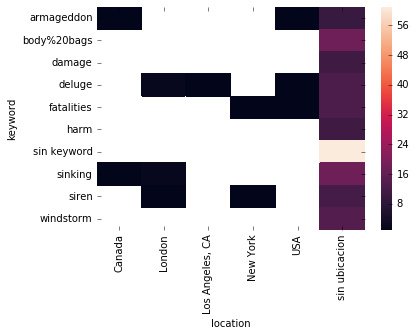

In [95]:
heat_map = heat_map.pivot("keyword", "location", "text_long")
ax = sns.heatmap(heat_map)

In [96]:
heat_map2 = tweets_filter.groupby(['keyword','location']).agg({'text_long':'mean'}).reset_index()

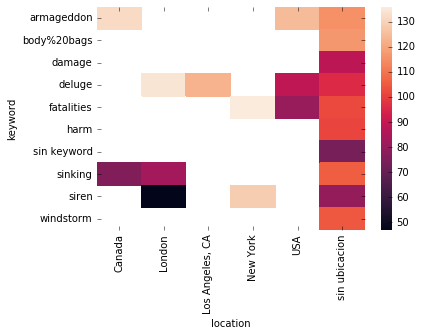

In [97]:
heat_map2 = heat_map2.pivot("keyword", "location", "text_long")
ax = sns.heatmap(heat_map2)

In [98]:
heat_map3 = tweets_filter.groupby(['keyword','location']).agg({'words_count':'mean'}).reset_index()

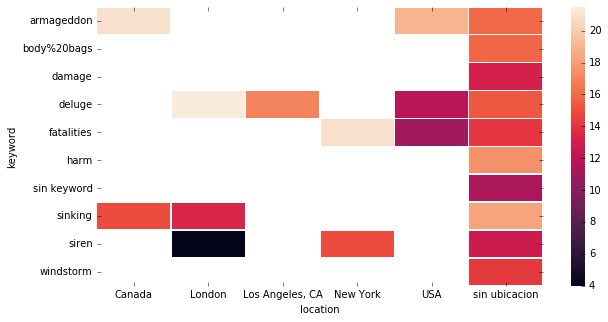

In [99]:
fig, ax = plt.subplots(figsize=(10,5))  
heat_map3 = heat_map3.pivot("keyword", "location", "words_count")
ax = sns.heatmap(heat_map3,linewidths=.5,ax=ax)

ax1.set_title("Promedio de la cantidad depalabras de un tweet según ubicación y palabra clave",fontsize=20)
ax1.set_xlabel("Ubicación de un tweet",fontsize=15)
ax1.set_ylabel("Palabra clave",fontsize=15)

In [100]:
heat_map.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, armageddon to windstorm
Data columns (total 6 columns):
Canada             2 non-null float64
London             3 non-null float64
Los Angeles, CA    1 non-null float64
New York           2 non-null float64
USA                3 non-null float64
sin ubicacion      10 non-null float64
dtypes: float64(6)
memory usage: 560.0+ bytes


In [107]:
##Saco el filtro por keyword utilizo, el filtro por localidad
heat_map4 = tweets_filter.groupby(['location','words_count']).agg({'text_long':'mean'}).reset_index()

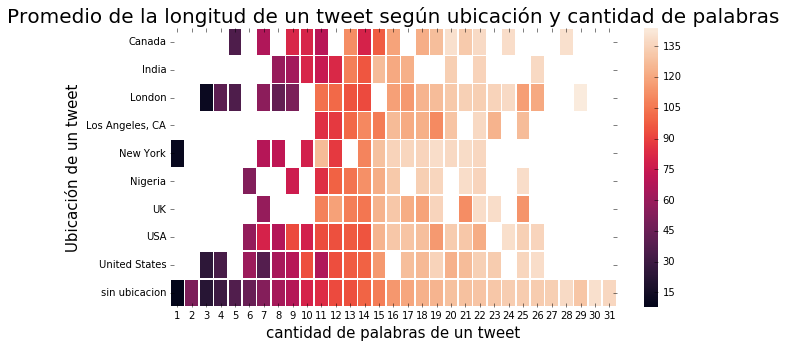

In [108]:
fig, ax = plt.subplots(figsize=(10,5))  
heat_map4 = heat_map4.pivot("location", "words_count", "text_long")
ax1 = sns.heatmap(heat_map4,  linewidths=.5,ax=ax)
ax1.set_title("Promedio de la longitud de un tweet según ubicación y cantidad de palabras",fontsize=20)
ax1.set_xlabel("cantidad de palabras de un tweet",fontsize=15)
ax1.set_ylabel("Ubicación de un tweet",fontsize=15)

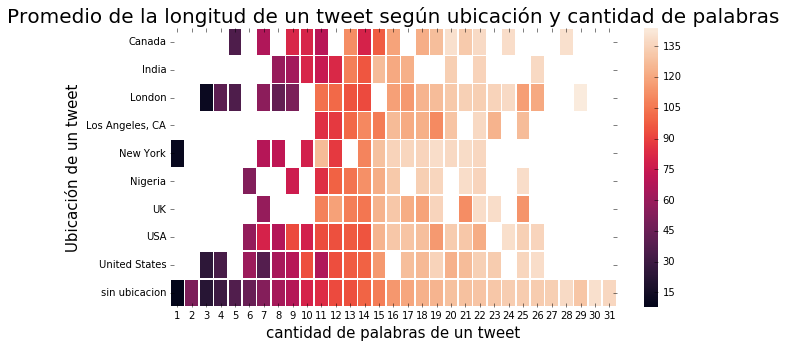

In [106]:
fig, ax = plt.subplots(figsize=(10,5))  
heat_map4 = heat_map4.pivot("location", "words_count", "text_long")
ax1 = sns.heatmap(heat_map4,  linewidths=.5,ax=ax)
ax1.set_title("Promedio de la longitud de un tweet según ubicación y cantidad de palabras",fontsize=20)
ax1.set_xlabel("cantidad de palabras de un tweet",fontsize=15)
ax1.set_ylabel("Ubicación de un tweet",fontsize=15)